<a href="https://colab.research.google.com/github/ChitrakCDB/MachineLearningAlgorithms/blob/main/parkinsonsAnaysisLHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive #to import google drive data

In [7]:
drive.mount('/content/drive') # mount the drive on colab using authentication

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cd /content/drive/"My Drive/Colab Notebooks/Files"

/content/drive/My Drive/Colab Notebooks/Files


In [9]:
data = pd.read_csv('parkinsons.txt')

In [10]:
data.head()
data=data.drop(['name'],axis=1)

In [11]:
data.shape

(195, 23)

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [13]:
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

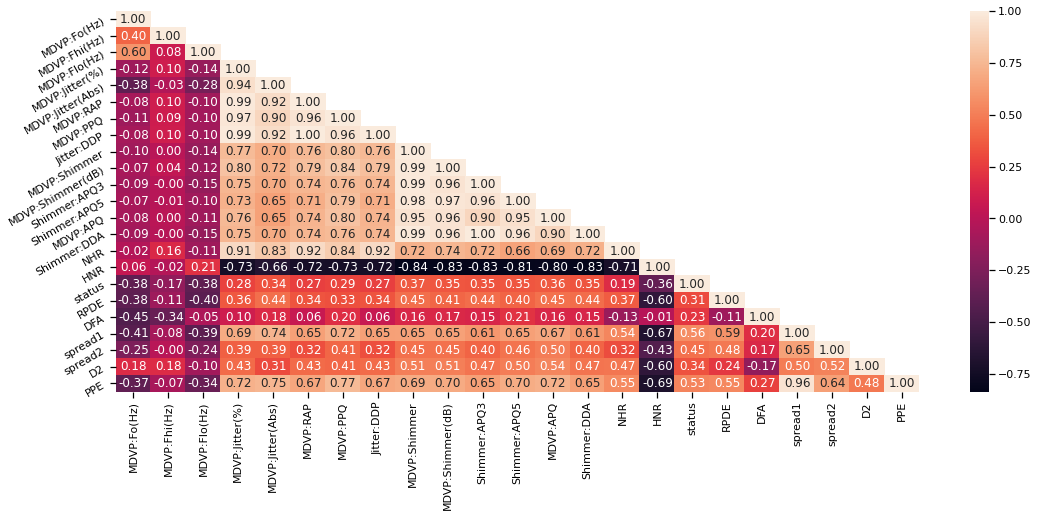

In [14]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [15]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop("status",axis=1)
Y = data["status"]

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
scaler.fit(data)

In [23]:
scaler_data = scaler.transform(data)

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=2)

In [26]:
pca.fit(scaler_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
x_pca=pca.transform(scaler_data)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
accuracy = []
for i in range(2,21):
  pca=PCA(n_components=i)
  pca.fit(scaler_data)
  x_pca=pca.transform(scaler_data)

  X_train, X_test, y_train,  y_test = train_test_split(x_pca, Y,train_size=0.8, test_size=0.2, random_state=42)

  rfcl = RandomForestClassifier(n_estimators = 50)
  rfcl = rfcl.fit(X_train, y_train)
  y_pred = rfcl.predict(X_test)
  rfcl.score(X_test , y_test)
  count_misclassified = (y_test != y_pred).sum()
  print("Accuracy of the model is:",metrics.accuracy_score(y_test, y_pred))
  print("Precision of the model is:",metrics.precision_score(y_test, y_pred))
  print("Recall of the model is:",metrics.recall_score(y_test, y_pred))
  print('Misclassified samples in Random Forest: {}'.format(count_misclassified))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
print(accuracy)

Accuracy of the model is: 0.9487179487179487
Precision of the model is: 0.96875
Recall of the model is: 0.96875
Misclassified samples in Random Forest: 2
Accuracy of the model is: 0.9487179487179487
Precision of the model is: 0.96875
Recall of the model is: 0.96875
Misclassified samples in Random Forest: 2
Accuracy of the model is: 0.9487179487179487
Precision of the model is: 0.96875
Recall of the model is: 0.96875
Misclassified samples in Random Forest: 2
Accuracy of the model is: 0.9230769230769231
Precision of the model is: 0.9393939393939394
Recall of the model is: 0.96875
Misclassified samples in Random Forest: 3
Accuracy of the model is: 0.9230769230769231
Precision of the model is: 0.9393939393939394
Recall of the model is: 0.96875
Misclassified samples in Random Forest: 3
Accuracy of the model is: 0.9743589743589743
Precision of the model is: 0.9696969696969697
Recall of the model is: 1.0
Misclassified samples in Random Forest: 1
Accuracy of the model is: 1.0
Precision of the 

Text(0.5, 1.0, 'Dimensions v/s Accuracy')

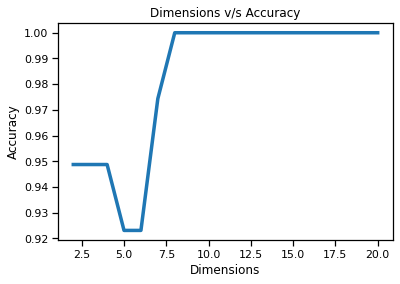

In [41]:
dimensions = np.array(range(2,21))
plt.plot(dimensions,accuracy)
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")
plt.title("Dimensions v/s Accuracy")